<h2 align="center">
<font color='green'>    Vale3 - Stock Analisys - Data Preparation</font></h2>   <img src=logo-vale-escudo-256.png style="float: left; width:80px; height:80px;" />


<h4 align="center"><font color='gray'>Data Preparation - Capture vale3 informationa from different sources, different periodicities to create a consistent data repositorie that will support the different algothms</font></h4>


<h4> <align="center"><font color='orange'> Information used : </font></h4>

- [1 - Daily Stock Prices](#1)
- [2 - Dividends](#2) 
- [3 - JSCP](#3) 
- [4 - TBD](#4) 
- [5 - TBD](#5) 
- [6 - TBD](#6) 
- [9 - Functions](#9)
  - [Verify duplicate rows in a file  9.1](#9.1)
  - [Verify duplicate rows in a Data Frame 9.2](#9.2)
  - [Verify NaN in a Data Frame 9.2](#9.3)
  - [Generate a CSV file 9.2](#9.4)

 #### 1 - Daily Stock Prices

 <p style="font-size: 16px;">Loading, cleaning and quality check for daily stock prices !</p>
 <p style="font-size: 12px;">Source: YFinance</p>
 <p style="font-size: 12px;">Type: File extracted Manually</p>
 <p style="font-size: 12px;">Obs. Choose file against API because the format were more suitable for the stretegy</p>
 <p style="font-size: 12px;">Obs1. avaliamos as informacoes de split, nao impactaram no preco das acoes</p>

In [38]:
# Importando as bibliotecas necessárias
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
##################################################
# Loading vale3.sa day trade info                #
##################################################
vale = pd.read_csv('VALE3.SA-16102023.csv')
vale.head()

In [ ]:
vale.info

In [ ]:
vale.describe()

In [ ]:
############################################################################################
# Convertendo a coluna 'data_obj' para datetime no formato do indice do arquivo vale3      #
# para deixar no mesmo formato dos campos do arquivo de dividendos                         #
############################################################################################

vale['Date'] = pd.to_datetime(vale['Date'], format='%Y-%m-%d')
vale.info()

In [16]:
############################################################################################
# Deleting some columns from the dataframe
############################################################################################
del vale['Open']
del vale['High']    
del vale['Low']
del vale['Adj Close']  
vale.head()

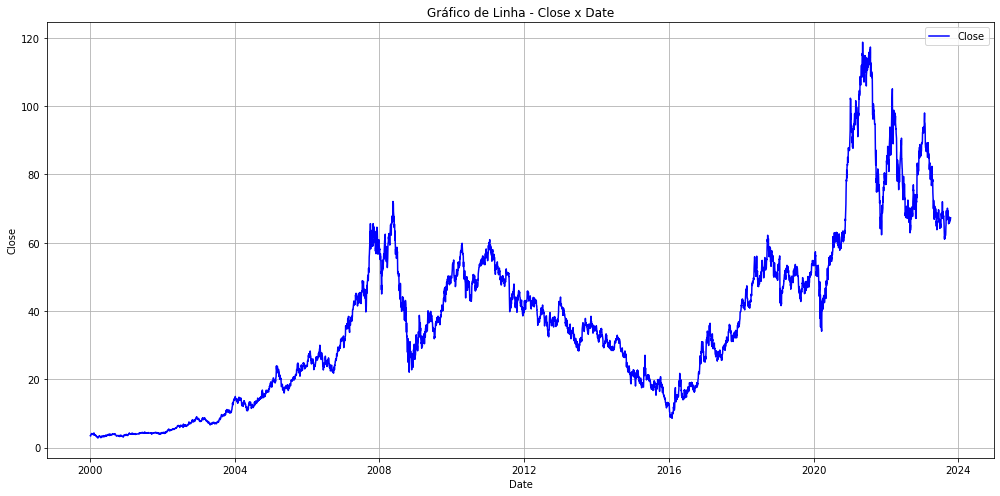

In [21]:
######################################################################################################
# Grafico em cima do preco de fechamento 'Close'                                                                #
# dataCom(NEGOCIADO ATÉ) - ate esta data quem estiver com o papel em carteira vai receber dividendos  #
#                                                                                                     #
#######################################################################################################

plt.figure(figsize=(14, 7))
plt.plot(vale['Date'], vale['Close'], label='Close', color='blue')
plt.title('Gráfico de Linha - Close x Date')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<p> <align="center"><font color='white'>Creating a new columns 'tomorrow' and 'target' to help in the prediction process</font></p>

In [22]:
# queremos mostrar se existe uma tendencia de alta, para isto vamos criar uma coluna 'tomorrow', vamos prever o amanha
# vamos utilizar o metodo shift do Pandas

vale['Tomorrow'] = vale['Close'].shift(-1)

In [24]:
# queremos prever que tomorrow's price seja maior que today's price
# tambem vamos converer os campos para inteiro usando a funcao astype(int)
vale['Target'] = (vale['Tomorrow'] > vale['Close']).astype(int)

In [25]:
vale.head()

,Date,Close,Volume,Tomorrow,Target
0,2000-01-03,3.500000,585600.0,3.416666,0
1,2000-01-04,3.416666,782400.0,3.416666,0
2,2000-01-05,3.416666,1876800.0,3.416666,0
3,2000-01-06,3.416666,792000.0,3.541666,1
4,2000-01-07,3.541666,5347200.0,3.833333,1


In [ ]:
# caso seja necessaria uma reducao na quantidade de linhas do arquivo, 
# entao vamos limpar usando o metodo loc

#vale = vale.loc['1990-01-01':].copy()

#### 2 -  Dividends
<hr>

 <p style="font-size: 16px;">Loading, cleaning and quality check for dividends information !</p>
 <p style="font-size: 12px;">Source: YFinance</p>
 <p style="font-size: 12px;">Type: File extracted Manually</p>
 <p style="font-size: 12px;">Obs. Choose file against API because the format were more suitable for the stretegy</p>

In [28]:
# Vamos verificar se as informacoes de DataCom estao integras e inseridas na base
dividendos = pd.read_csv('VALE3.SA_Dividendos.csv')
dividendos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       33 non-null     object 
 1   Dividends  33 non-null     float64
dtypes: float64(1), object(1)
memory usage: 656.0+ bytes


In [109]:
dividendos.head()

,Date,Dividends
0,2008-04-11,0.436585
1,2008-10-17,0.138520
2,2009-04-16,0.524586
3,2009-10-16,0.492036
4,2010-04-15,0.421661


In [29]:
############################################################################################
# Convertendo a coluna 'data_obj' para datetime no formato do indice do arquivo dividendos #
# para deixar no mesmo formato dos campos do arquivo de vale                               #
############################################################################################

dividendos['Date'] = pd.to_datetime(dividendos['Date'], format='%Y-%m-%d')
dividendos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       33 non-null     datetime64[ns]
 1   Dividends  33 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 656.0 bytes


In [ ]:
dividendos

In [ ]:

# Merge the 'Aprovado' information into your DataFrame
#vale_div = vale.merge(dividendos[['Dividends']], left_index=True, right_on='Dividends', how='left')
vale_div = vale.merge(dividendos, left_on='Date', right_on='Date', how='left')
vale_div.head()

In [110]:
vale_div.head()

,Date,Close,Volume,Tomorrow,Target,Dividends
0,2000-01-03,3.500000,585600.0,3.416666,0,NaN
1,2000-01-04,3.416666,782400.0,3.416666,0,NaN
2,2000-01-05,3.416666,1876800.0,3.416666,0,NaN
3,2000-01-06,3.416666,792000.0,3.541666,1,NaN
4,2000-01-07,3.541666,5347200.0,3.833333,1,NaN


In [111]:
vale_div[vale_div['Date'] == '2008-10-17']

,Date,Close,Volume,Tomorrow,Target,Dividends
2256,2008-10-17,25.200001,8228100.0,28.549999,1,0.13852


In [34]:
#
# Verificando se a informacao de dividendos foi carregada corretamente
#
vale_div[vale_div['Date'] == '2022-03-09']

,Date,Close,Volume,Tomorrow,Target,Dividends
5574,2022-03-09,94.190002,41051200.0,97.300003,1,3.719256


In [39]:
#
# sera que quando a vale anuncia pagamento de dividendos na dataCom, as acoes sobem ?
# parece que temos um up de preco e volume


correlation_matrix = vale_div.corr()

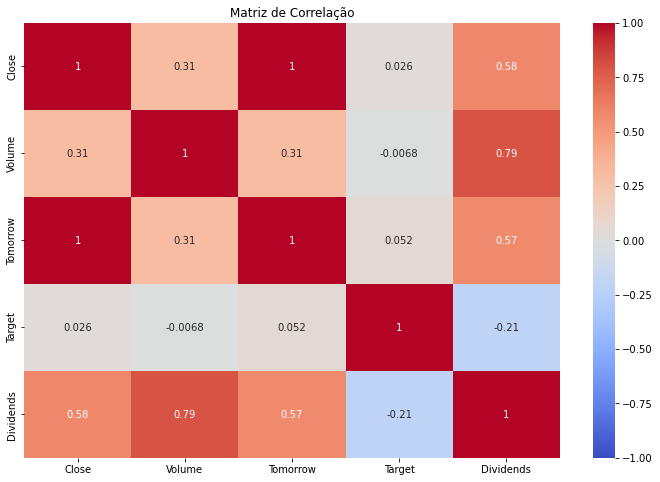

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

#### 3 -  JCSP
<hr>

 <p style="font-size: 16px;">Loading, cleaning and quality check for JCSP information !</p>
 <p style="font-size: 12px;">Source: YFinance</p>
 <p style="font-size: 12px;">Type: File extracted Manually</p>
 <p style="font-size: 12px;">Obs. Choose file against API because the format were more suitable for the stretegy</p>

In [72]:
#######################################################################################################
# Carregando informacoes de JSCP	                                                              #
# dataCom(NEGOCIADO ATÉ) - ate esta data quem estiver com o papel em carteira vai receber dividendos  #
# APROVADO - data de aprovacao do pagamento do dividendo                                              #
# VALOR (R$) - Valor por acao que sera pago apurado conforme balanco                                  #
#######################################################################################################

JSCP = pd.read_csv('Vale3-ProventosGeral.csv')
JSCP	

,TIPO,VALOR (R$),% / FATOR,VALOR EMISSÃO (R$),APROVADO,NEGOCIADO ATÉ,PAGAMENTO
0,JSCP,"1,91",n/d,n/d,27/07/23,11/08/23,01/09/23
1,Dividendo,"1,82",n/d,n/d,16/02/23,13/03/23,22/03/23
2,JSCP,"0,290809381",n/d,n/d,01/12/22,12/12/22,n/d
3,Dividendo,"2,03",n/d,n/d,28/07/22,11/08/22,01/09/22
4,JSCP,"1,53",n/d,n/d,28/07/22,11/08/22,01/09/22
5,Dividendo,"3,71",n/d,n/d,24/02/22,08/03/22,16/03/22
6,Dividendo,"8,19",n/d,n/d,16/09/21,22/09/21,30/09/21
7,Dividendo,"0,716268047",n/d,n/d,17/06/21,23/06/21,30/06/21
8,Dividendo,"1,46",n/d,n/d,17/06/21,23/06/21,30/06/21
9,Dividendo,"3,42",n/d,n/d,25/02/21,04/03/21,15/03/21


In [73]:
# criando um data frame com as informacoes de JSCP apenas
JSCP = JSCP[JSCP['TIPO'] == 'JSCP']
JSCP


,TIPO,VALOR (R$),% / FATOR,VALOR EMISSÃO (R$),APROVADO,NEGOCIADO ATÉ,PAGAMENTO
0,JSCP,"1,91",n/d,n/d,27/07/23,11/08/23,01/09/23
2,JSCP,"0,290809381",n/d,n/d,01/12/22,12/12/22,n/d
4,JSCP,"1,53",n/d,n/d,28/07/22,11/08/22,01/09/22
10,JSCP,"0,835736883",n/d,n/d,25/02/21,04/03/21,15/03/21
12,JSCP,"0,997344547",n/d,n/d,10/09/20,21/09/20,30/09/20
13,JSCP,"1,41",n/d,n/d,19/12/19,26/12/19,n/d


In [74]:
# Deletando as colunas que nao vamos utilizar
del JSCP['TIPO']
del JSCP['% / FATOR']
del JSCP['VALOR EMISSÃO (R$)']
del JSCP['APROVADO']
del JSCP['PAGAMENTO']
JSCP

,VALOR (R$),NEGOCIADO ATÉ
0,"1,91",11/08/23
2,"0,290809381",12/12/22
4,"1,53",11/08/22
10,"0,835736883",04/03/21
12,"0,997344547",21/09/20
13,"1,41",26/12/19


In [75]:
# REnomenado a coluna para jscpDataCom
JSCP.rename(columns={
    'VALOR (R$)': 'jscpValor',
    'NEGOCIADO ATÉ': 'jscpDataCom'
    }, inplace=True)
JSCP

/tmp/ipykernel_1497898/1346415934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JSCP.rename(columns={


,jscpValor,jscpDataCom
0,"1,91",11/08/23
2,"0,290809381",12/12/22
4,"1,53",11/08/22
10,"0,835736883",04/03/21
12,"0,997344547",21/09/20
13,"1,41",26/12/19


In [82]:
############################################################################################
# Convertendo a coluna 'data_obj' para datetime no formato do indice do arquivo dividendos #
# para deixar no mesmo formato dos campos do arquivo de vale                               #
############################################################################################

JSCP['jscpDataCom'] = pd.to_datetime(JSCP['jscpDataCom'], format='%d/%m/%y')
JSCP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 13
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   jscpValor    6 non-null      object        
 1   jscpDataCom  6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 144.0+ bytes


/tmp/ipykernel_1497898/2635134513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JSCP['jscpDataCom'] = pd.to_datetime(JSCP['jscpDataCom'], format='%d/%m/%y')


In [122]:
JSCP

,jscpValor,jscpDataCom
0,"1,91",2023-08-11
2,"0,290809381",2022-12-12
4,"1,53",2022-08-11
10,"0,835736883",2021-03-04
12,"0,997344547",2020-09-21
13,"1,41",2019-12-26


In [105]:
JSCP[JSCP['jscpDataCom'] == '2022-12-12']

,jscpValor,jscpDataCom
2,"0,290809381",2022-12-12


In [112]:
# Merge the 'Aprovado' information into your DataFrame

vale_div_jscp = vale_div.merge(JSCP, left_on='Date', right_on='jscpDataCom', how='left')
vale_div_jscp.head()

,Date,Close,Volume,Tomorrow,Target,Dividends,jscpValor,jscpDataCom
0,2000-01-03,3.500000,585600.0,3.416666,0,NaN,NaN,NaT
1,2000-01-04,3.416666,782400.0,3.416666,0,NaN,NaN,NaT
2,2000-01-05,3.416666,1876800.0,3.416666,0,NaN,NaN,NaT
3,2000-01-06,3.416666,792000.0,3.541666,1,NaN,NaN,NaT
4,2000-01-07,3.541666,5347200.0,3.833333,1,NaN,NaN,NaT


In [113]:
vale_div_jscp[vale_div_jscp['Date'] == '2020-09-21']

,Date,Close,Volume,Tomorrow,Target,Dividends,jscpValor,jscpDataCom
5214,2020-09-21,60.0,53120800.0,57.810001,0,NaN,"0,997344547",2020-09-21


In [96]:
# A data JSCP nao esta sendo eficiente no treinamento do modelo, vamos deletar 
# e ajustar os campos de valores


/tmp/ipykernel_1497898/3162017325.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  vale_div_jscp['jscpDataCom'] = vale_div_jscp['jscpDataCom'].apply(lambda x: x.strftime('%Y-%m-%d') if not pd.isnull(x) else x)


In [115]:
# transformando a coluna 'jscpDataCom' em binário para facilitar o trabalho do modelo
# alem disto estava tendo muito problema com a formatacao da data
# Iterando sobre as linhas do DataFrame e modificando a coluna 'jscpDataCom'
for index, row in vale_div_jscp.iterrows():
    if row['jscpDataCom'] != 0:
        vale_div_jscp.at[index, 'jscpDataCom'] = 1
    else:
        vale_div_jscp.at[index, 'jscpDataCom'] = 0

# Exibindo as primeiras linhas do DataFrame modificado
vale_div_jscp.head()

,Date,Close,Volume,Tomorrow,Target,Dividends,jscpValor,jscpDataCom
0,2000-01-03,3.500000,585600.0,3.416666,0,NaN,NaN,1
1,2000-01-04,3.416666,782400.0,3.416666,0,NaN,NaN,1
2,2000-01-05,3.416666,1876800.0,3.416666,0,NaN,NaN,1
3,2000-01-06,3.416666,792000.0,3.541666,1,NaN,NaN,1
4,2000-01-07,3.541666,5347200.0,3.833333,1,NaN,NaN,1


In [117]:
# Eliminando os nulos nos campos 
nulls_to_zero(vale_div_jscp)

(           Date      Close      Volume   Tomorrow  Target  Dividends  \
 0    2000-01-03   3.500000    585600.0   3.416666       0        0.0   
 1    2000-01-04   3.416666    782400.0   3.416666       0        0.0   
 2    2000-01-05   3.416666   1876800.0   3.416666       0        0.0   
 3    2000-01-06   3.416666    792000.0   3.541666       1        0.0   
 4    2000-01-07   3.541666   5347200.0   3.833333       1        0.0   
 ...         ...        ...         ...        ...     ...        ...   
 5972 2023-10-09  66.379997  14392200.0  66.779999       1        0.0   
 5973 2023-10-10  66.779999  18261700.0  67.360001       1        0.0   
 5974 2023-10-11  67.360001  13659400.0  66.589996       0        0.0   
 5975 2023-10-13  66.589996  16302700.0  67.300003       1        0.0   
 5976 2023-10-16  67.300003  13103300.0   0.000000       0        0.0   
 
      jscpValor  jscpDataCom  
 0            0            1  
 1            0            1  
 2            0            1 

In [126]:
dividendos


,Date,Dividends
0,2008-04-11,0.436585
1,2008-10-17,0.138520
2,2009-04-16,0.524586
3,2009-10-16,0.492036
4,2010-04-15,0.421661
5,2010-10-15,0.471881
6,2011-01-17,0.320048
7,2011-04-14,0.608247
8,2011-08-12,0.933403
9,2011-10-17,0.634329


    jscpValor	jscpDataCom
0	1,91	    2023-08-11
2	0,290809381	2022-12-12
4	1,53	    2022-08-11
10	0,835736883	2021-03-04
12	0,997344547	2020-09-21
13	1,41	    2019-12-26

In [131]:
vale_div_jscp[vale_div_jscp['Date'] == '2023-08-11']

,Date,Close,Volume,Tomorrow,Target,Dividends,jscpValor,jscpDataCom
5932,2023-08-11,65.510002,42335100.0,61.900002,0,0.0,"1,91",1


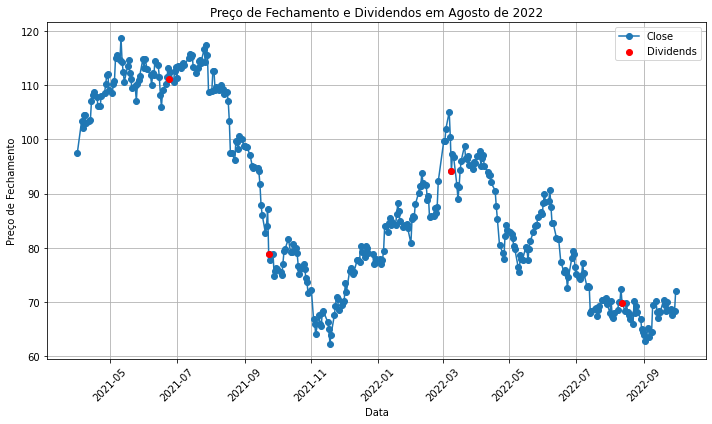

In [136]:


# Filtrando os dados para o período de agosto de 2022
df_august_2022 = vale_div_jscp[(vale_div_jscp['Date'] >= '2021-04-01') & (vale_div_jscp['Date'] <= '2022-09-30')]
df_dividends = df_august_2022[df_august_2022['Dividends'] != 0]

# 
# Plotando o gráfico de linha com duas linhas: 'Close' e 'Dividends'
plt.figure(figsize=(10, 6))
plt.plot(df_august_2022['Date'], df_august_2022['Close'], marker='o', linestyle='-', label='Close')
plt.scatter(df_dividends['Date'], df_dividends['Close'], color='red', label='Dividends', zorder=5)
plt.title('Preço de Fechamento e Dividendos em Agosto de 2022')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

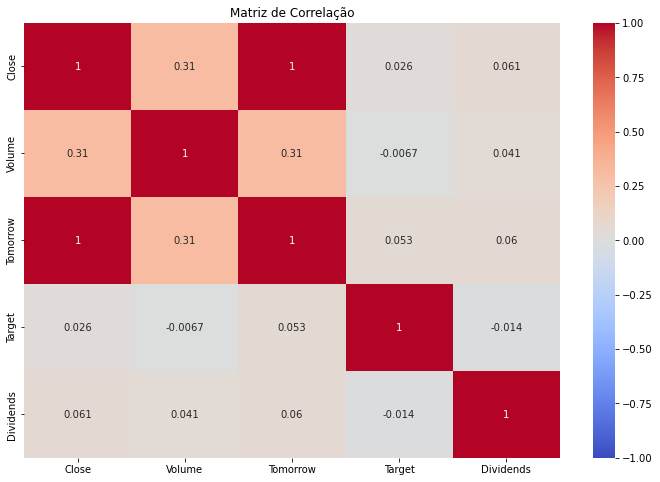

In [103]:
#
# Finalizada a primeira faze que tinha como objetivo montar uma 
# estrutura de dados com informacoes de dividendos e jscp
#
correlation_matrix = vale_div_jscp.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

In [108]:
# exportando o modelo para rodar os algoritmos
gera_csv(vale_div_jscp, nome_arquivo='vale_div_jscp.csv', )

'Arquivo vale_div_jscp.csv gerado com sucesso.'


### Functions Used
<hr>
<p> Some functions were created to support the data cleasing process 

In [116]:
def nulls_to_zero(df):
    """
    Substitui valores nulos em um DataFrame do pandas por zero.
    
    Args:
    - df (pd.DataFrame): DataFrame de entrada.

    Returns:
    - pd.DataFrame: DataFrame com valores nulos substituídos por zero.
    - str: Mensagem informando a quantidade de valores convertidos ou um erro.
    """
    try:
        # Contando a quantidade de valores nulos antes da substituição
        null_count = df.isnull().sum().sum()
        
        # Substituindo valores nulos por zero
        df.fillna(0, inplace=True)
        
        message = f"{null_count} valores nulos foram substituídos por zero."
        return df, message
    except Exception as e:
        return df, f"Ocorreu um erro: {str(e)}"



In [8]:
# Verificando linhas duplicadas em um determinado arquivo txt, csv, etc
def file_linhas_duplicadas(filename):
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            lines = file.readlines()
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
    
    line_counts = {}  # Dicionário para armazenar a contagem de cada linha
    for line in lines:
        line = line.strip()  # Removendo espaços em branco no início e no fim
        line_counts[line] = line_counts.get(line, 0) + 1  # Incrementando a contagem
    
    # Calculando o número de linhas duplicadas
    duplicate_lines_count = sum(count - 1 for count in line_counts.values() if count > 1)
    
    return duplicate_lines_count

In [9]:
"""
    Esta função verifica se um DataFrame tem linhas duplicadas.
    
    Parâmetros:
    df (pandas.DataFrame): O DataFrame a ser verificado.
    
    Retorno:
    int: O número de linhas duplicadas no DataFrame.
"""

def df_linhas_duplicadas(df):
   
    linhas_duplicadas = df.duplicated().sum()
    return linhas_duplicadas


In [10]:

def verifica_nulos(df):
    """
    Esta função verifica se um DataFrame tem informações nulas.
    
    Parâmetros:
    df (pandas.DataFrame): O DataFrame a ser verificado.
    
    Retorno:
    pandas.DataFrame ou str: As linhas com informações nulas ou uma mensagem indicando que não há nulos.
    """
    # Verifica se há alguma célula nula no DataFrame
    if df.isnull().values.any():
        # Retorna as linhas que têm algum valor nulo
        linhas_nulas = df[df.isnull().any(axis=1)]
        return linhas_nulas
    else:
        # Retorna uma mensagem indicando que não há valores nulos
        return "Não existem valores nulos no DataFrame."

# Exemplo de uso:
# Suponha que df seja o DataFrame que você quer verificar.
# resultado = verifica_nulos(df)
# print(resultado)


In [107]:
# Funcao para gerar um arquivo csv para alimentar os diversos modelos que serao utilizados
# no projeto

def gera_csv(df, nome_arquivo='dados.csv'):
    """
    Esta função recebe um DataFrame pandas como parâmetro e gera um arquivo CSV.
    
    Parâmetros:
    df (pandas.DataFrame): O DataFrame a ser convertido em CSV.
    nome_arquivo (str): O nome do arquivo CSV a ser gerado. O padrão é 'dados.csv'.
    
    Retorno:
    str: Uma mensagem indicando sucesso ou falha na geração do arquivo CSV.
    """
    try:
        # Gera o arquivo CSV
        df.to_csv(nome_arquivo, index=False)
        return f'Arquivo {nome_arquivo} gerado com sucesso.'
    except Exception as e:
        # Retorna uma mensagem de erro se algo der errado
        return f'Ocorreu um erro ao gerar o arquivo CSV: {str(e)}'

# Exemplo de uso:
# Suponha que df seja o DataFrame que você quer converter em CSV.
# mensagem = gera_csv(df, 'meu_arquivo.csv')
# print(mensagem)

